<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/ML_Lab_Experiments/ML_Experiment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===========================================================
# Decision Tree vs Random Forest Classification on heart.csv
# ===========================================================

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/ML Practical/Student_Dataset_Cleaned.csv")

In [ ]:
print("Dataset Shape:", data.shape)
print("Target column distribution:\n", data['Target'].value_counts())

Dataset Shape: (4424, 33)
Target column distribution:
 Target
0    3003
1    1421
Name: count, dtype: int64


In [ ]:
# Step 3: Separate features and target
X = data.drop("Target", axis=1)
y = data["Target"]

In [ ]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 3539, Testing samples: 885


In [ ]:
# Step 5: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# -----------------------------------------------------------
# Decision Tree Classifier
# -----------------------------------------------------------

# Step 6: Initialize and train the model
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Step 7: Predictions
y_pred_dt = dt.predict(X_test_scaled)
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Step 8: Evaluate Decision Tree
acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)
print("\n=== Decision Tree Performance ===")
print(f"Accuracy: {acc_dt:.4f}")
print(f"ROC-AUC: {auc_dt:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


=== Decision Tree Performance ===
Accuracy: 0.8554
ROC-AUC: 0.9003
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       601
           1       0.82      0.70      0.76       284

    accuracy                           0.86       885
   macro avg       0.85      0.81      0.83       885
weighted avg       0.85      0.86      0.85       885



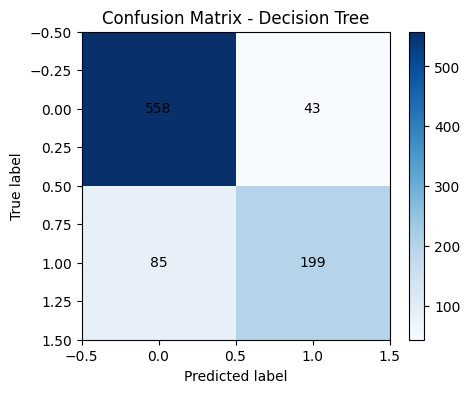

In [ ]:
# Step 9: Visualize confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
plt.imshow(cm_dt, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix - Decision Tree")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_dt[i, j], ha="center", va="center", color="black")
plt.show()

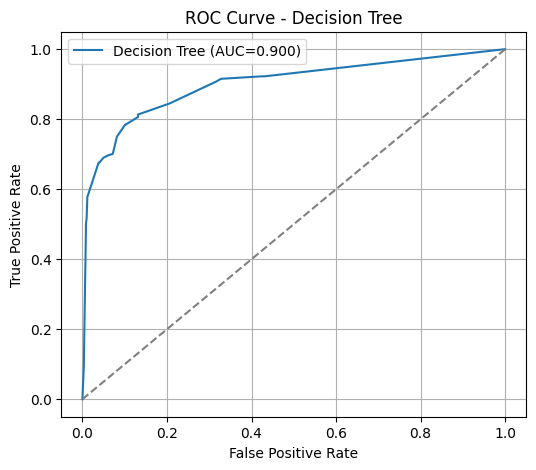

In [ ]:
# Step 10: ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# -----------------------------------------------------------
# Random Forest Classifier
# -----------------------------------------------------------

# Step 11: Initialize and train the model
rf = RandomForestClassifier(
    n_estimators=100, criterion="gini", max_depth=5, random_state=42
)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Step 12: Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Step 13: Evaluate Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("\n=== Random Forest Performance ===")
print(f"Accuracy: {acc_rf:.4f}")
print(f"ROC-AUC: {auc_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest Performance ===
Accuracy: 0.8757
ROC-AUC: 0.9191
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       601
           1       0.87      0.73      0.79       284

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.87      0.88      0.87       885



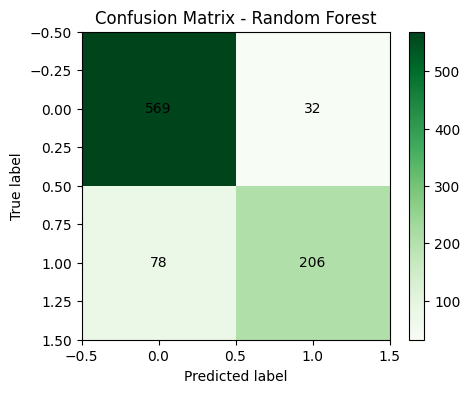

In [ ]:
# Step 14: Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
plt.imshow(cm_rf, cmap="Greens", interpolation="nearest")
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center", color="black")
plt.show()

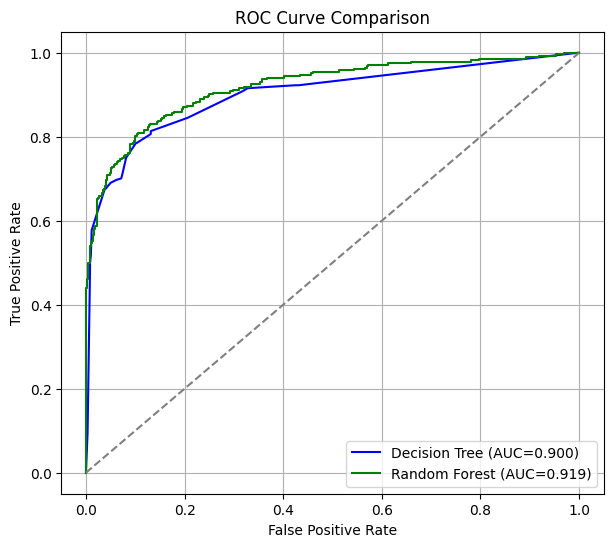

In [ ]:
# Step 15: ROC curve comparison
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(7, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.3f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# -----------------------------------------------------------
# Step 16: Cross-Validation Comparison
# -----------------------------------------------------------
cv_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring="accuracy")
cv_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring="accuracy")

print("\nCross-Validation (5-fold):")
print(f"Decision Tree - Mean: {cv_dt.mean():.4f}, Std: {cv_dt.std():.4f}")
print(f"Random Forest - Mean: {cv_rf.mean():.4f}, Std: {cv_rf.std():.4f}")



Cross-Validation (5-fold):
Decision Tree - Mean: 0.8562, Std: 0.0071
Random Forest - Mean: 0.8666, Std: 0.0109


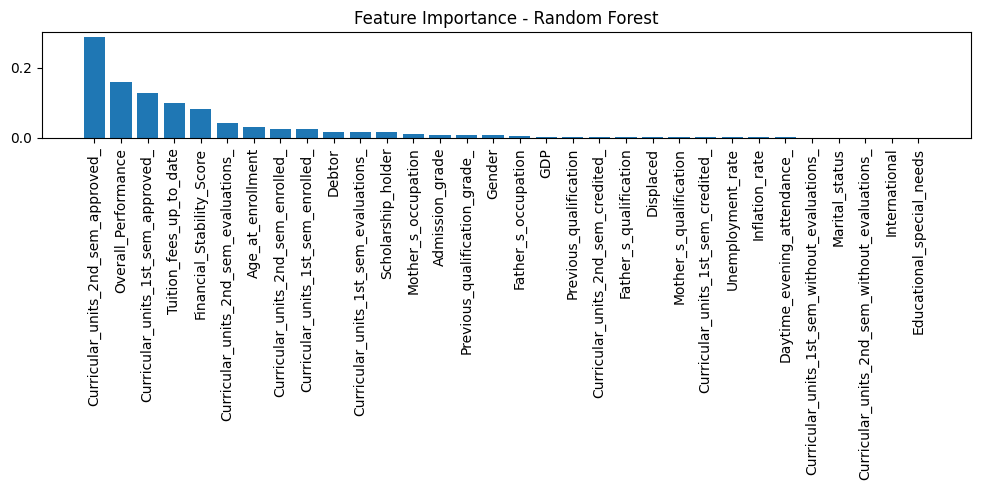

In [ ]:
# -----------------------------------------------------------
# Step 17: Feature Importance (Random Forest)
# -----------------------------------------------------------
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------------------------------------
# Step 18: Summary
# -----------------------------------------------------------
summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [acc_dt, acc_rf],
    'ROC_AUC': [auc_dt, auc_rf],
    'CV_Mean': [cv_dt.mean(), cv_rf.mean()]
})
print("\nModel Comparison Summary:\n", summary)


Model Comparison Summary:
            Model  Accuracy   ROC_AUC   CV_Mean
0  Decision Tree  0.855367  0.900272  0.856174
1  Random Forest  0.875706  0.919137  0.866629
